<a href="https://colab.research.google.com/github/seventwentyfor/CSST101-3B-1AY2526/blob/main/Assessment_task_no3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part1-Unification

In [8]:
rule_predicate = "Eligible"
rule_variable = "x"


fact_predicate = "Eligible"
fact_constant = "Ana"


if rule_predicate == fact_predicate:
    substitution = {rule_variable: fact_constant}
    print("Unification successful!")
    print("Substitution set:", substitution)
else:
    print("Cannot unify. Predicates do not match.")

Unification successful!
Substitution set: {'x': 'Ana'}


Part2-Forward chaining

In [5]:
students = {
    "Juan":   {"HighGrades": True,  "StudentLeader": True,  "Applied": True},
    "Maria":  {"HighGrades": True,  "StudentLeader": False, "Applied": False},
    "Carlos": {"HighGrades": False, "StudentLeader": True,  "Applied": False},
    "Ana":    {"HighGrades": True,  "StudentLeader": True,  "Applied": True}
}


eligible = {s for s,f in students.items() if f["HighGrades"] and f["StudentLeader"] and f["Applied"]}
scholarship = eligible.copy()
financial = scholarship.copy()


for s in students:
    derived = []
    if s in eligible:
        derived.append("Eligible")
    if s in scholarship:
        derived.append("Scholarship")
    if s in financial:
        derived.append("FinancialSupport")
    print(f"{s}: {', '.join(derived) if derived else 'No new derived facts'}")


for s in ["Maria","Carlos"]:
    f = students[s]
    reasons = [r for r,b in [
        ("No HighGrades", not f["HighGrades"]),
        ("Not StudentLeader", not f["StudentLeader"]),
        ("Did not apply", not f["Applied"])
    ] if b]
    print(f"{s} not eligible because:", ", ".join(reasons))

Juan: Eligible, Scholarship, FinancialSupport
Maria: No new derived facts
Carlos: No new derived facts
Ana: Eligible, Scholarship, FinancialSupport
Maria not eligible because: Not StudentLeader, Did not apply
Carlos not eligible because: No HighGrades, Did not apply


Part3-Backward chaining

In [7]:
students = {
    "Juan":   {"HighGrades": True,  "StudentLeader": True,  "Applied": True},
    "Maria":  {"HighGrades": True,  "StudentLeader": False, "Applied": False},
    "Carlos": {"HighGrades": False, "StudentLeader": True,  "Applied": False},
    "Ana":    {"HighGrades": True,  "StudentLeader": True,  "Applied": True}
}


def eligible(x):
    s = students[x]
    return s["HighGrades"] and s["StudentLeader"] and s["Applied"]

def scholarship(x):
    return eligible(x)
def financial_support(x):
    return scholarship(x)


goals = [("Scholarship","Maria"), ("FinancialSupport","Ana")]

for g, name in goals:
    if g == "Scholarship":
        print(f"Goal: Scholarship({name})")
        print(" Check if Eligible first...")
        print("  Eligible:", eligible(name))
        print("  Scholarship:", scholarship(name))
    elif g == "FinancialSupport":
        print(f"\nGoal: FinancialSupport({name})")
        print(" Check if Scholarship first...")
        print("  Scholarship:", scholarship(name))
        print("  FinancialSupport:", financial_support(name))

Goal: Scholarship(Maria)
 Check if Eligible first...
  Eligible: False
  Scholarship: False

Goal: FinancialSupport(Ana)
 Check if Scholarship first...
  Scholarship: True
  FinancialSupport: True


***Reasoning***

***Goal 1: Scholarship(Maria)***

To get a scholarship, Maria must be eligible.

Eligibility requires HighGrades + Leader + Applied.

Maria has HighGrades but did not apply and is not a leader.

Therefore, she is not eligible → no scholarship.

**Goal 2: FinancialSupport(Ana)** *italicized text*

To get financial support, Ana must have a scholarship.

Scholarship requires eligibility.

Ana has HighGrades, is a Leader, and Applied, so she is eligible → scholarship

→ financial support.

Part4-Truth table + student check

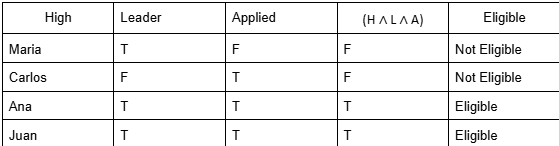

Part5-Reflection

Logical reasoning is important because it helps AI and people make decisions step by step using clear rules. It avoids guessing and makes sure the conclusion is fair and supported by facts. In real life, this is useful in situations like scholarships, where decisions must be just and consistent. It also shows us how the result was reached, which makes the process more understandable and trustworthy.